# UK Polling Data

As the 2015 UK general election result was quite surprising to the pollsters, it is natural to ask why they were surprised and to analyse the polling data.  Mark Pack has aggregated all the polling data from the 1940s into an excel spreadsheet and made it available to the geenral public.  It is a fantastic resource and can be downloaded from the following website:

http://www.markpack.org.uk/opinion-polls/

As ever, the first thing to do is to read in the file and look at it to see what is in there.

In [1]:
# First of all, import files into python
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import xlrd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#xlsfile = pd.ExcelFile('./Data/Polls/Mark-Packs-opinion-polls-spreadsheet_macl.xls')

xl1 = pd.ExcelFile("./Data/Polls/Mark-Packs-opinion-polls-spreadsheet_macl.xls")
xl1.sheet_names

[u'Introduction',
 u'43-45',
 u'45-50',
 u'50-51',
 u'51-55',
 u'55-59',
 u'59-64',
 u'64-66',
 u'66-70',
 u'70-74',
 u'74',
 u'74-79',
 u'79-83',
 u'83-87',
 u'87-92',
 u'92-97',
 u'97-01',
 u'01-05',
 u'05-10',
 u'10-15',
 u'15-',
 u'Monthly average',
 u'By election polls',
 u'2014 Euros',
 u'Ratings',
 u'P-polls',
 u'YouGov accuracy',
 u'YouGov rolling']

Now, this file comprises many sheets.  Most of the sheets separate the polling into different year ranges.  The first one I will look at is the most recent, which is 2010 onwards.  To do this, I parse by the sheet name, which is "10-"

In [3]:
#df_2010_2015 = xlsfile.parse('10-')
df_2010_2015 = xl1.parse("10-15")

In [4]:
df_2010_2015

,Year,Month,Fieldwork,Unnamed: 3,Published,Unnamed: 5,Polling,Publisher,Con,Unnamed: 9,...,Govt net,Question.1,Con.1,Lab.1,LD.1,UKIP.1,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,2010,May,12-13,2010-05-12,16,NaN,ComRes,IoS/SM,38.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,May,12-13,2010-05-12,16,NaN,ICM,STel,38.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,May,13-14,2010-05-13,16,NaN,YouGov,ST,37.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,May,14-16,2010-05-14,19,NaN,Angus RS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,May,19,2010-05-19,20?,NaN,YouGov,Sun,NaN,NaN,...,20,Do you approve or disapprove of the Government...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,May,19-20,2010-05-19,NaN,NaN,YouGov,NaN,NaN,NaN,...,20,Do you approve or disapprove of the Government...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,May,20-21,2010-05-20,23,NaN,YouGov,ST,39.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,May,21-25,2010-05-21,NaN,NaN,Opinium,NaN,38.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,May,21-24,2010-05-21,25,NaN,Angus RS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,May,21-23,2010-05-21,25,NaN,ICM,Gu,39.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Another one to look at is the 05-10 polls.  There was a hung parliament in 2010 which led to a coalition government formed by the conservatives and the Liberal Democrats

In [5]:
df_2005_2010 = xl1.parse('05-10')

In [6]:
df_2005_2010.head()

,Year,Month,Fieldwork,Unnamed: 3,Published,Polling,Publisher,Con,Unnamed: 8,M,...,LD good,LD bad,LD net,Question,Unnamed: 48,MORI LD,YouGov LD,ICM LD,Populus LD,ComRes LD
0,2005,May,19-23,2011-05-19,NaN,MORI,First Tuesday,27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,May,19-23,2005-05-19,NaN,MORI,FT,30,NaN,NaN,...,49,28,21,Are you satisfied or dissatisfied with the way...,NaN,26,,,,
2,NaN,May,24-26,2005-05-24,NaN,YouGov,DT,31,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,,23,,,
3,NaN,Jun,16-20,2005-06-16,7,MORI,Social Research Institute,29,-1,NaN,...,46,26,20,Are you satisfied or dissatisfied with the way...,NaN,21,,,,
4,NaN,Jun,17-19,2005-06-17,21,ICM,GU,31,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,,


Note that there are a lot of columns in these files and I need to investigate which ones can be dropped or not, as not all will be relevant to my analysis.

The different columns in the 2010-2015 data are:

- 0) Year - Year the poll was taken.  Not every value is filled in.
- 1) Month - Month the poll was taken.
- 2) Fieldwork - Days of the month that the poll was taken.
- 3) Unnamed: 3 - Date format of the date that the poll was started
- 4) Published - The day of the month that it was published.  Often uncertain
- 5) Unnamed: 5 - empty?
- 6) Polling - Name of the polling company
- 7) Publisher - Newspaper which published it
- 8) Con - Conservative polling value
- 9) Unnamed: 9 - Difference in polling value between for the Conservatives between this poll and the previous poll by the same company
- 10) Lab - Labour polling value
- 11) Unnamed: 11 - Difference in polling value between for Labour between this poll and the previous poll by the same company
- 12) LD - Liberal Democrats polling value
- 13) Unnamed: 13 - Difference in polling value between for the Liberal Democrats between this poll and the previous poll by the same company
- 14) Con lead - the Conservative lead in the opinion polls when compared to Labour.  Note that a negative number would mean that Labour were ahead in the polls
- 15) Unnamed: 15 - Difference in the value of the Conservative lead between this poll and the previous poll by the same company
- 16) Unnamed: 16 - Type of poll (internet, phone)
- 17) Unnamed: 17 - Comments
- 18) Unnamed: 18 - Unknown (empty?)
- 19) Unnamed: 19 - Unknown (empty?)
- 20) UKIP - UKIP polling value
- 21) Green - Green polling value
- 22) BNP - BNP polling value
- 23) Unnamed: 23 - Unknown (empty?)
- 24) Leader: - I think this is just separating the previous columns from the next ones
- 25) Con good - % of respondents who approve of the Conservative leader
- 26) Con bad - % of respondents who disapprove of the Conservative leader
- 27) Con net - net %
- 28) Lab good - % of respondents who approve of the Labour leader
- 29) Lab bad - % of respondents who adispprove of the Labour leader
- 30) Lab net - net %
- 31) LD good - % of respondents who approve of the Liberal Democrats leader
- 32) LD bad - % of respondents who disapprove of the Liberal Democrats leader
- 33) LD net - net %
- 34) UKIP good - % of respondents who approve of the UKIP leader
- 35) UKIP bad - % of respondents who disapprove of the UKIP leader
- 36) UKIP net - net % 
- 37) Grn good - % of respondents who approve of the Greens leader
- 38) Grn bad - % of respondents who disapprove of the Greens leader
- 39) Grn net - net %

The next few columns are a bit ambiguous but deal with questions relating to the Liberal Democrats and how people rate the leader.  That is not surprising as the document author is a Liberal Democrat activist.

- 40) Question
- 41) Con best PM
- 42) Lab best PM
- 43) LD best PM
- 44) UKIP best PM
- 45) Unnamed: 45
- 46) Govt good
- 47) Govt bad
- 48) Govt net
- 49) Question.1
- 50) Con.1
- 51) Lab.1
- 52) LD.1
- 53) UKIP.1
- 54) Unnamed: 54
- 55) Unnamed: 55
- 56) Unnamed: 56
- 57) Unnamed: 57

So there are a lot of columns to deal with in this DataFrame!!  

However, I can probably drop the following columns:

* 0, 1, 2 - all the information is in column 3
* 4 - lots of missing values and some uncertainties.  The info appears to be redundant
* 5, 18, 19, 23, 24 - these look to be empty
* 27, 30, 36, 39 - these calculate the difference between the previous two columns.  I can recalculate this if necessary
* 40 - 57 - not a lot of general information in these



The first thing to do is to drop all of the end columns (39 onwards) that I don't want.

In [7]:
df_2010_2015 = df_2010_2015.ix[:,:39]
df_2010_2015.head()

,Year,Month,Fieldwork,Unnamed: 3,Published,Unnamed: 5,Polling,Publisher,Con,Unnamed: 9,...,Lab bad,Lab net,LD good,LD bad,LD net,UKIP good,UKIP bad,UKIP net,Grn good,Grn bad
0,2010,May,12-13,2010-05-12,16,NaN,ComRes,IoS/SM,38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,May,12-13,2010-05-12,16,NaN,ICM,STel,38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,May,13-14,2010-05-13,16,NaN,YouGov,ST,37,NaN,...,NaN,NaN,46,14,32,NaN,NaN,NaN,NaN,NaN
3,NaN,May,14-16,2010-05-14,19,NaN,Angus RS,NaN,NaN,NaN,...,56,-18,56,33,23,NaN,NaN,NaN,NaN,NaN
4,NaN,May,19,2010-05-19,20?,NaN,YouGov,Sun,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now I can drop the rest by index value

In [8]:
df_2010_2015.drop(df_2010_2015.columns[[0,1,2,4,5,18,19,23,24,27,30,36]], axis=1, inplace=True)

In [9]:
df_2010_2015.tail()

,Unnamed: 3,Polling,Publisher,Con,Unnamed: 9,Lab,Unnamed: 11,LD,Unnamed: 13,Con lead,...,Con bad,Lab good,Lab bad,LD good,LD bad,LD net,UKIP good,UKIP bad,Grn good,Grn bad
2092,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2093,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2094,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2095,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, instead of the original 58 columns, I am left with "only" 27 columns.  At least it is a bit more manageable.  I will also want to rename some of the columns.

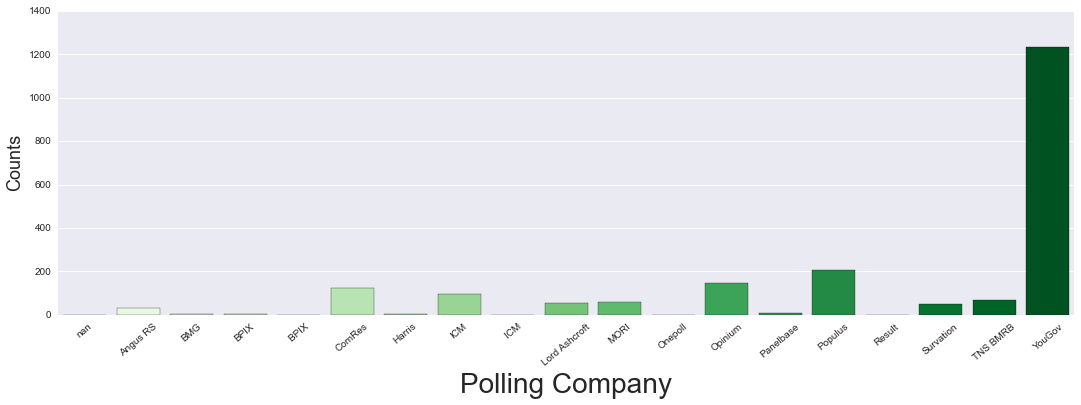

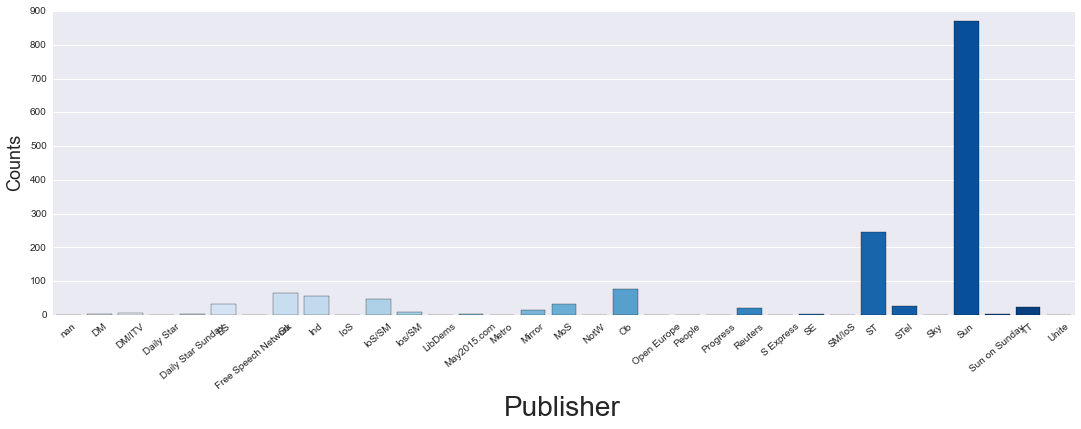

In [10]:
h = sns.factorplot("Polling", data = df_2010_2015,palette="Greens",aspect=3)
plt.xlabel('Polling Company', fontsize=28)
plt.ylabel('Counts', fontsize=18)
plt.title("")
h.set_xticklabels(rotation=40)

g = sns.factorplot("Publisher", data = df_2010_2015,palette="Blues",aspect=3)
plt.xlabel('Publisher', fontsize=28)
plt.ylabel('Counts', fontsize=18)
plt.title("")
g.set_xticklabels(rotation=40)

Note that there are a lot of different polls represented in this dataset and a lot of different publishers.  However, YouGov are the dominant polling company and the Sun newspaper is the dominant publisher.  It will be interestign to see which poll results are in the Sun.  This is fairly straightforward to calculate so I will do this now

In [11]:
Sun_2010_2015_df = df_2010_2015[df_2010_2015["Publisher"] == "Sun"]

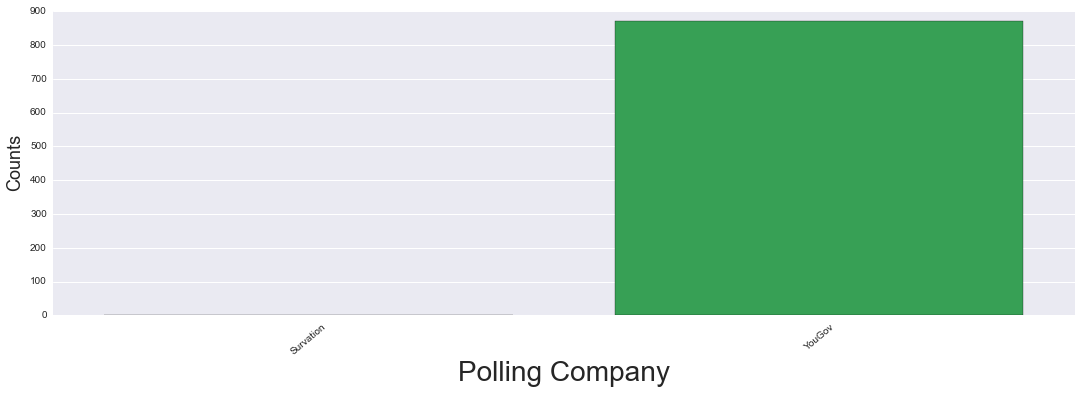

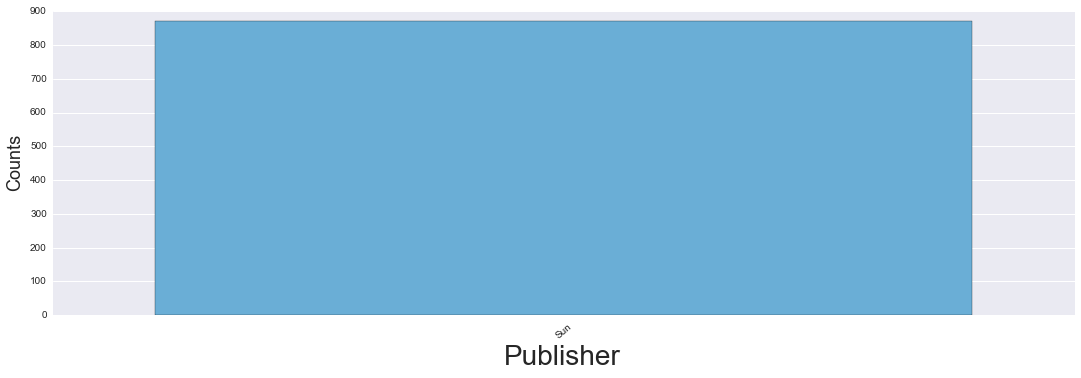

In [12]:
h = sns.factorplot("Polling", data = Sun_2010_2015_df,palette="Greens",aspect=3)
plt.xlabel('Polling Company', fontsize=28)
plt.ylabel('Counts', fontsize=18)
plt.title("")
h.set_xticklabels(rotation=40)

g = sns.factorplot("Publisher", data = Sun_2010_2015_df,palette="Blues",aspect=3)
plt.xlabel('Publisher', fontsize=28)
plt.ylabel('Counts', fontsize=18)
plt.title("")
g.set_xticklabels(rotation=40)

As expected, The Sun almost exclusively only published polls from YouGov.

The first thing I want to do is to change the name of the "Unnamed: 3" column to "Date" which is what it is and it makes sense.  This is done below.

In [13]:
new_columns = df_2010_2015.columns.values
new_columns[0] = "Date"
new_columns[11] = "Type"
df_2010_2015.columns = new_columns

It turns out that there are some strange dates in this file.  Only 3, but they were dated as being in 1900!.  Therefore, in order to remove these spurious dates, I am parsing the DataFrame so that it only contains dates which are after 2010.

In [14]:
df_2010_2015 = df_2010_2015[df_2010_2015["Date"]>2009-12-12]

In [15]:
df_2010_2015.head()
type(df_2010_2015["Date"][0])

pandas.tslib.Timestamp

Now, it is time to make my first plot.  I will plot all of the polling data in this 2010-2015 DataFrame for the Conservatives (blue), Labour (red), Liberal Democrats (yellow), UKIP (black) and Greens (green).  I have used the traditional colours of the parties apart from UKIP which I don't know.

In [16]:
ScottishElection = pd.Timestamp('2014-09-18')

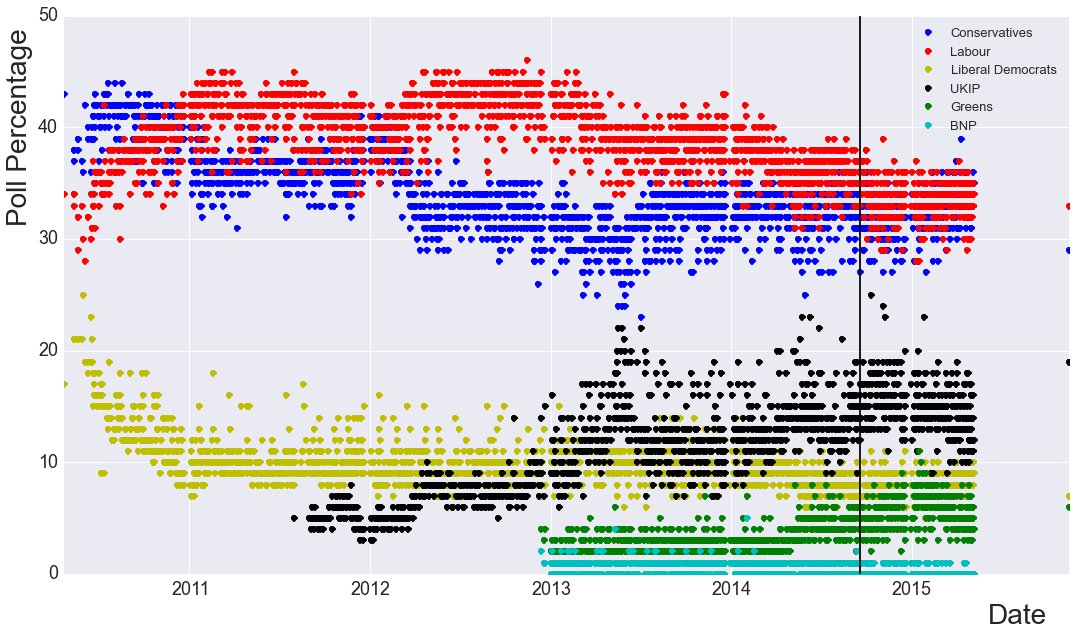

In [17]:
fig = plt.figure(figsize=(18,10))

plt.plot(df_2010_2015["Date"],df_2010_2015["Con"],'bo',label="Conservatives")
plt.plot(df_2010_2015["Date"],df_2010_2015["Lab"],'ro',label="Labour")
plt.plot(df_2010_2015["Date"],df_2010_2015["LD"],'yo',label="Liberal Democrats")
plt.plot(df_2010_2015["Date"],df_2010_2015["UKIP"],'ko',label="UKIP")
plt.plot(df_2010_2015["Date"],df_2010_2015["Green"],'go',label="Greens")
plt.plot(df_2010_2015["Date"],df_2010_2015["BNP"],'co',label="BNP")
plt.legend(fontsize=13)
plt.xlabel("Date",fontsize=28,x=0.95,y=1)
plt.ylabel("Poll Percentage",fontsize=28,x=0,y=0.8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.plot((ScottishElection, ScottishElection), (0, 50), 'k-')
plt.show()

The above plot I think is quite impressive. The bands are relatively wide which could come simply from the yearss being squashed together on this scale.  However, it also includes every poll and this is probably the answer.  Note that there is data for the Conservatives, Labour and the Liberal Democrats from the start of this time but UKIP, BNP and the Greens only come in later.

What is interesting is that the Liberal Democrat support fell sharply after the election in 2010 whilst the Conservatives support just faded away gradually.  As expected, the opposition support is quite good in the middle of an election period before falling off towards the end.

The black vertical line represents the Scottish independence referendum on 18th September 2014.  These polls include Scotland, but that referendum doesn't appear to have made an differences to the polling data I have.

One of the questions is where the support for UKIP came from.  Is it all from the Conservatives, does it come from the Liberal Democrats?  At the very least, it would be good to know where the Liberal Democrat support went to.

Also, are there any differences between internet and phone polling?  As I have duplicate dates, a seaborn time-series plot won't work (and therefore hue won't work), so I need to plot using matplotlib as above.  However, I can still apply cuts and this is shown in the figure below.

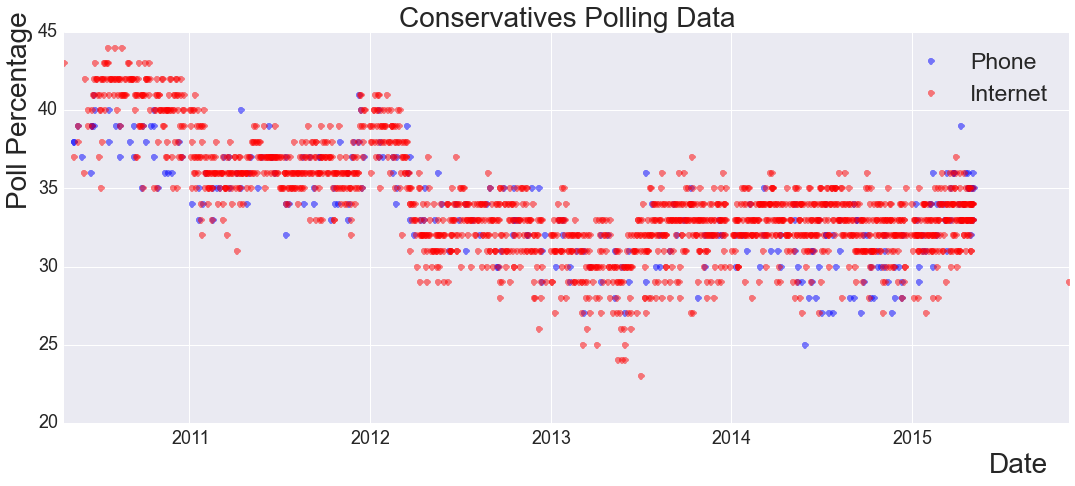

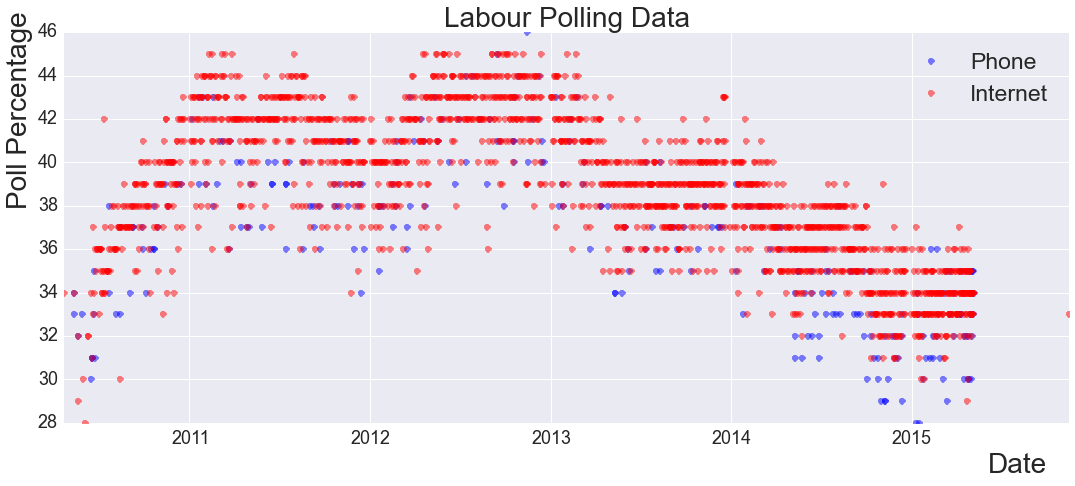

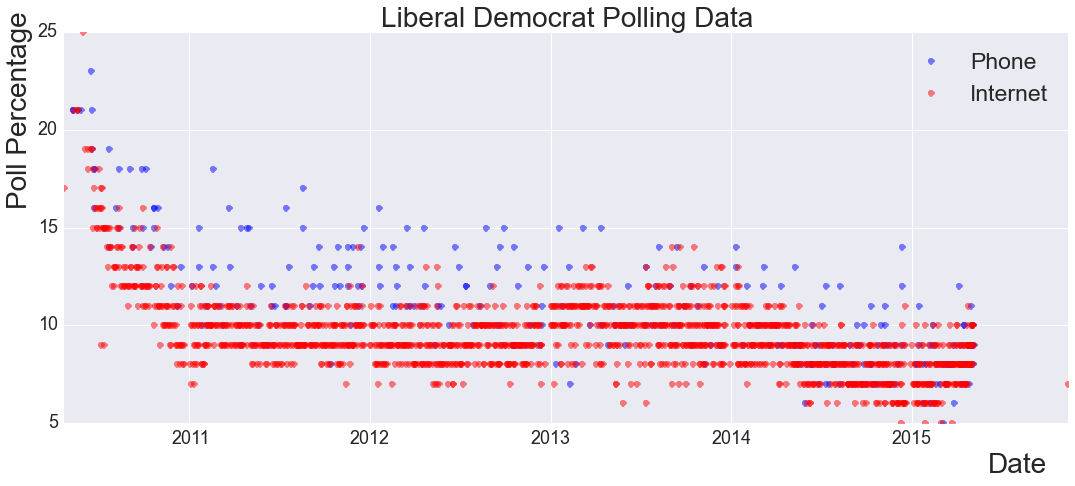

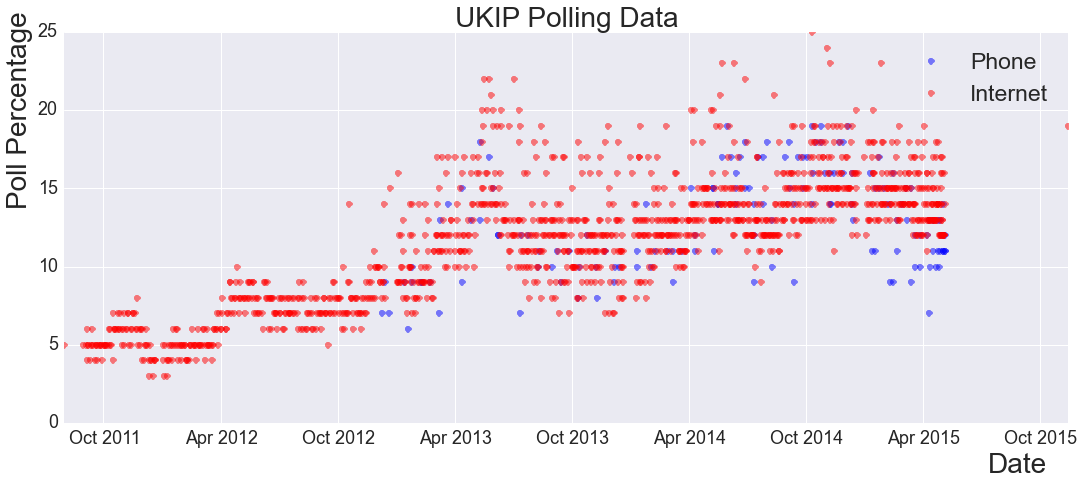

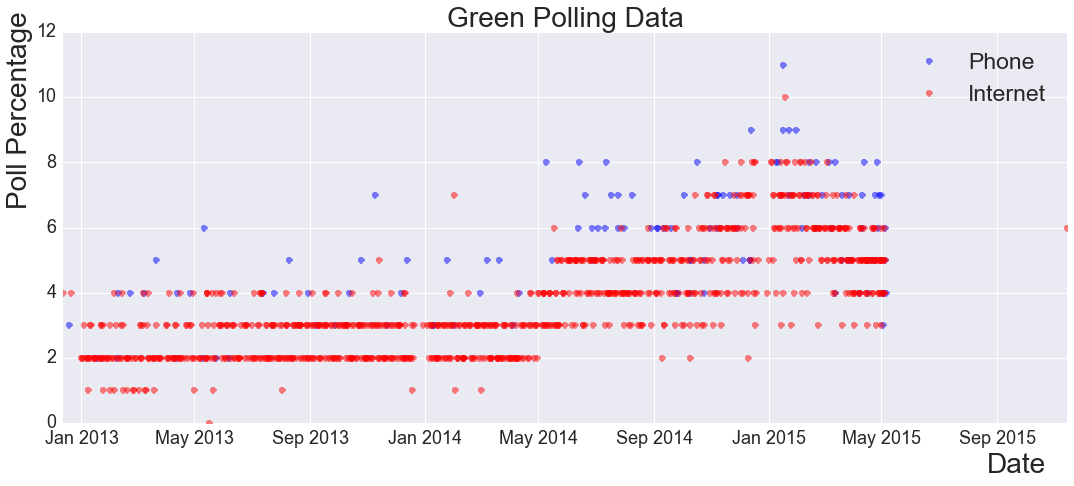

In [18]:
fig = plt.figure(figsize=(18,7))

plt.plot(df_2010_2015[df_2010_2015["Type"] == "Phone"]["Date"],df_2010_2015[df_2010_2015["Type"] == "Phone"]["Con"],'bo',alpha=0.5,label="Phone")
plt.plot(df_2010_2015[df_2010_2015["Type"] == "Internet"]["Date"],df_2010_2015[df_2010_2015["Type"] == "Internet"]["Con"],'ro',alpha=0.5,label="Internet")
plt.legend(fontsize=23)
plt.xlabel("Date",fontsize=28,x=0.95,y=1)
plt.ylabel("Poll Percentage",fontsize=28,x=0,y=0.8)
plt.title("Conservatives Polling Data",fontsize=28)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

fig = plt.figure(figsize=(18,7))
plt.plot(df_2010_2015[df_2010_2015["Type"] == "Phone"]["Date"],df_2010_2015[df_2010_2015["Type"] == "Phone"]["Lab"],'bo',alpha=0.5,label="Phone")
plt.plot(df_2010_2015[df_2010_2015["Type"] == "Internet"]["Date"],df_2010_2015[df_2010_2015["Type"] == "Internet"]["Lab"],'ro',alpha=0.5,label="Internet")
plt.legend(fontsize=23)
plt.xlabel("Date",fontsize=28,x=0.95,y=1)
plt.ylabel("Poll Percentage",fontsize=28,x=0,y=0.8)
plt.title("Labour Polling Data",fontsize=28)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

fig = plt.figure(figsize=(18,7))
plt.plot(df_2010_2015[df_2010_2015["Type"] == "Phone"]["Date"],df_2010_2015[df_2010_2015["Type"] == "Phone"]["LD"],'bo',alpha=0.5,label="Phone")
plt.plot(df_2010_2015[df_2010_2015["Type"] == "Internet"]["Date"],df_2010_2015[df_2010_2015["Type"] == "Internet"]["LD"],'ro',alpha=0.5,label="Internet")
plt.legend(fontsize=23)
plt.xlabel("Date",fontsize=28,x=0.95,y=1)
plt.ylabel("Poll Percentage",fontsize=28,x=0,y=0.8)
plt.title("Liberal Democrat Polling Data",fontsize=28)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

fig = plt.figure(figsize=(18,7))
plt.plot(df_2010_2015[df_2010_2015["Type"] == "Phone"]["Date"],df_2010_2015[df_2010_2015["Type"] == "Phone"]["UKIP"],'bo',alpha=0.5,label="Phone")
plt.plot(df_2010_2015[df_2010_2015["Type"] == "Internet"]["Date"],df_2010_2015[df_2010_2015["Type"] == "Internet"]["UKIP"],'ro',alpha=0.5,label="Internet")
plt.legend(fontsize=23)
plt.xlabel("Date",fontsize=28,x=0.95,y=1)
plt.ylabel("Poll Percentage",fontsize=28,x=0,y=0.8)
plt.title("UKIP Polling Data",fontsize=28)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

fig = plt.figure(figsize=(18,7))
plt.plot(df_2010_2015[df_2010_2015["Type"] == "Phone"]["Date"],df_2010_2015[df_2010_2015["Type"] == "Phone"]["Green"],'bo',alpha=0.5,label="Phone")
plt.plot(df_2010_2015[df_2010_2015["Type"] == "Internet"]["Date"],df_2010_2015[df_2010_2015["Type"] == "Internet"]["Green"],'ro',alpha=0.5,label="Internet")
plt.legend(fontsize=23)
plt.xlabel("Date",fontsize=28,x=0.95,y=1)
plt.ylabel("Poll Percentage",fontsize=28,x=0,y=0.8)
plt.title("Green Polling Data",fontsize=28)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()


Interestingly, there appears to be no (or little) difference between the internet and phone polling for most of the parties.  Visually, however, it looks like there are differences for the Liberal Democrats.  I can quantify this below.

In [19]:
print "Conservative mean rating from phone polling =", round(df_2010_2015[df_2010_2015["Type"] == "Phone"]["Con"].mean(),2), "+/-", round(df_2010_2015[df_2010_2015["Type"] == "Phone"]["Con"].std(),2)
print "Conservative mean rating from internet polling =", round(df_2010_2015[df_2010_2015["Type"] == "Internet"]["Con"].mean(),2), "+/-", round(df_2010_2015[df_2010_2015["Type"] == "Phone"]["Con"].std(),2)
print ""
print "Labour mean rating from phone polling =", round(df_2010_2015[df_2010_2015["Type"] == "Phone"]["Lab"].mean(),2), "+/-", round(df_2010_2015[df_2010_2015["Type"] == "Phone"]["Lab"].std(),2)
print "Labour mean rating from internet polling =", round(df_2010_2015[df_2010_2015["Type"] == "Internet"]["Lab"].mean(),2), "+/-", round(df_2010_2015[df_2010_2015["Type"] == "Phone"]["Lab"].std(),2)
print ""
print "Liberal Democrat mean rating from phone polling =", round(df_2010_2015[df_2010_2015["Type"] == "Phone"]["LD"].mean(),2), "+/-", round(df_2010_2015[df_2010_2015["Type"] == "Phone"]["LD"].std(),2)
print "Liberal Democrat mean rating from internet polling =", round(df_2010_2015[df_2010_2015["Type"] == "Internet"]["LD"].mean(),2), "+/-", round(df_2010_2015[df_2010_2015["Type"] == "Phone"]["LD"].std(),2)
print ""
print "UKIP mean rating from phone polling =", round(df_2010_2015[df_2010_2015["Type"] == "Phone"]["UKIP"].mean(),2), "+/-", round(df_2010_2015[df_2010_2015["Type"] == "Phone"]["UKIP"].std(),2)
print "UKIP mean rating from internet polling =", round(df_2010_2015[df_2010_2015["Type"] == "Internet"]["UKIP"].mean(),2), "+/-", round(df_2010_2015[df_2010_2015["Type"] == "Phone"]["UKIP"].std(),2)
print ""
print "Green mean rating from phone polling =", round(df_2010_2015[df_2010_2015["Type"] == "Phone"]["Green"].mean(),2), "+/-", round(df_2010_2015[df_2010_2015["Type"] == "Phone"]["Green"].std(),2)
print "Green mean rating from internet polling =", round(df_2010_2015[df_2010_2015["Type"] == "Internet"]["Green"].mean(),2), "+/-", round(df_2010_2015[df_2010_2015["Type"] == "Phone"]["Green"].std(),2)


Conservative mean rating from phone polling = 33.5 +/- 3.27
Conservative mean rating from internet polling = 33.92 +/- 3.27

Labour mean rating from phone polling = 36.28 +/- 3.79
Labour mean rating from internet polling = 38.61 +/- 3.79

Liberal Democrat mean rating from phone polling = 11.27 +/- 3.21
Liberal Democrat mean rating from internet polling = 9.45 +/- 3.21

UKIP mean rating from phone polling = 12.82 +/- 3.15
UKIP mean rating from internet polling = 11.73 +/- 3.15

Green mean rating from phone polling = 5.53 +/- 1.83
Green mean rating from internet polling = 3.68 +/- 1.83


So, although it is not immediately obvious graphically, then apart from the Greens, everything is within 1 standard deviation.  This is surprising looking at the Liberal Democrats vote, but I guess it is because of the wide variance in results.  

Although it is just within 1 standard deviation, I think that it is interesting observation still, especially as there is seemingly a trend, where the phone polling data is consistently above the internet polling data.

Now, the question I have is what companies were using phone polling and which were using internet polling.  I can plot this now.

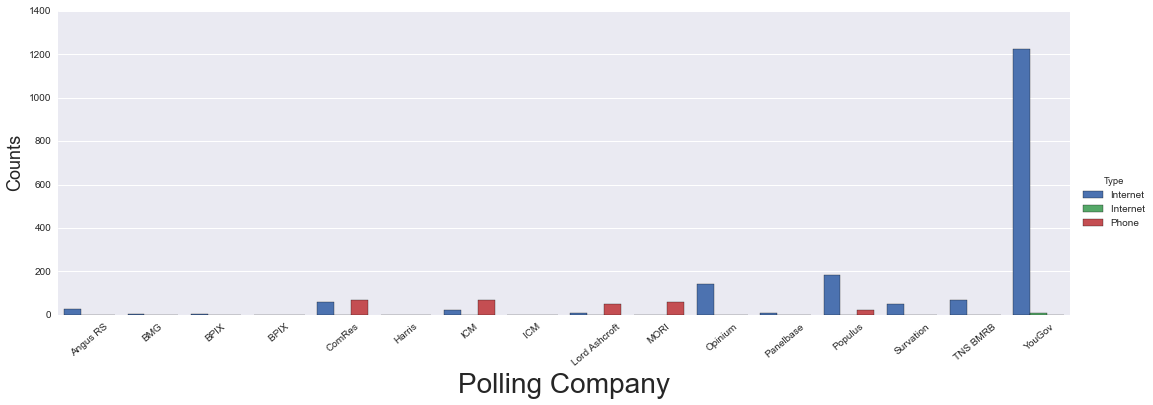

In [20]:
h = sns.factorplot("Polling", data = df_2010_2015,hue="Type",aspect=3)
plt.xlabel('Polling Company', fontsize=28)
plt.ylabel('Counts', fontsize=18)
plt.title("")
h.set_xticklabels(rotation=40)

So, YouGov, which were the main pollsters, carried things out on the internet whereas other pollsters like ICM, Lord Ashcroft and MORI were predominantly phone based pollsters.

At some point, looking over 5 years of data is not relevant, as many things change between then and now.  So, I will also create a DataFrame just for each year.

In [21]:
df_2015 = df_2010_2015[df_2010_2015["Date"]>"2014-12-31"][df_2010_2015["Date"]<"2016-01-01"]
df_2014 = df_2010_2015[df_2010_2015["Date"]>"2013-12-31"][df_2010_2015["Date"]<"2015-01-01"]
df_2013 = df_2010_2015[df_2010_2015["Date"]>"2012-12-31"][df_2010_2015["Date"]<"2014-01-01"]
df_2012 = df_2010_2015[df_2010_2015["Date"]>"2011-12-31"][df_2010_2015["Date"]<"2013-01-01"]
df_2011 = df_2010_2015[df_2010_2015["Date"]>"2010-12-31"][df_2010_2015["Date"]<"2012-01-01"]
df_2010 = df_2010_2015[df_2010_2015["Date"]>"2009-12-31"][df_2010_2015["Date"]<"2011-01-01"]

/Users/macl2/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [22]:
df_2015.head()

,Date,Polling,Publisher,Con,Unnamed: 9,Lab,Unnamed: 11,LD,Unnamed: 13,Con lead,...,Con bad,Lab good,Lab bad,LD good,LD bad,LD net,UKIP good,UKIP bad,Grn good,Grn bad
1804,2015-11-14,Lord Ashcroft,NaN,29,NaN,33,NaN,7,NaN,-4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1859,2015-01-02,Populus,NaN,34,-1,36,1,9,0,-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1860,2015-01-04,YouGov,NaN,31,-1,34,-2,7,1,-3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1861,2015-01-05,YouGov,NaN,33,2,33,-1,7,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1862,2015-01-06,YouGov,NaN,32,-1,33,0,7,0,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


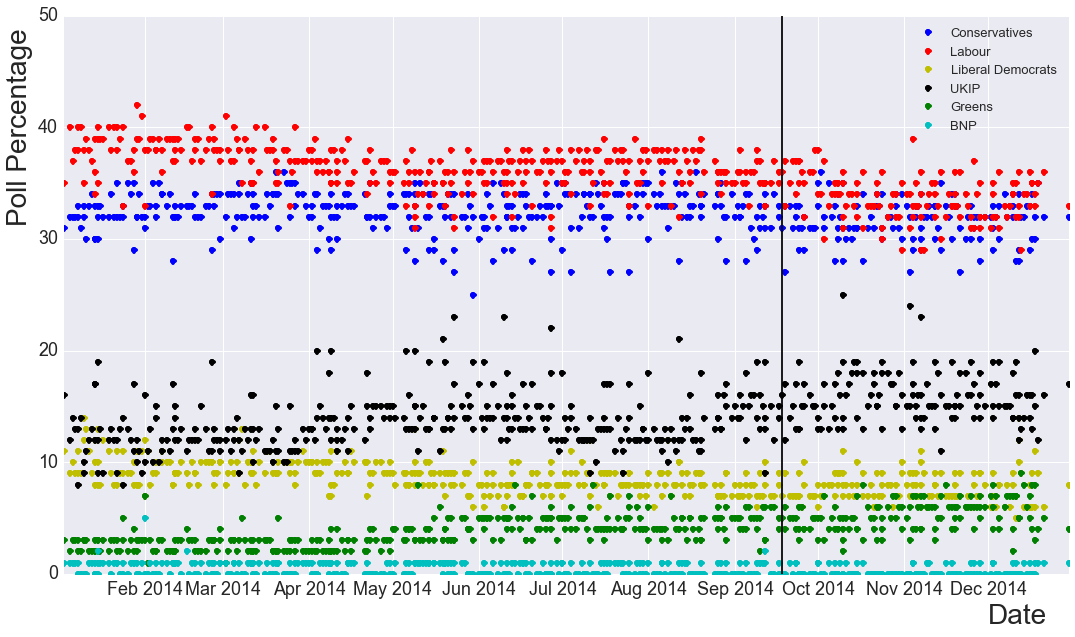

In [23]:
fig = plt.figure(figsize=(18,10))

plt.plot(df_2014["Date"],df_2014["Con"],'bo',label="Conservatives")
plt.plot(df_2014["Date"],df_2014["Lab"],'ro',label="Labour")
plt.plot(df_2014["Date"],df_2014["LD"],'yo',label="Liberal Democrats")
plt.plot(df_2014["Date"],df_2014["UKIP"],'ko',label="UKIP")
plt.plot(df_2014["Date"],df_2014["Green"],'go',label="Greens")
plt.plot(df_2014["Date"],df_2014["BNP"],'co',label="BNP")
plt.legend(fontsize=13)
plt.xlabel("Date",fontsize=28,x=0.95,y=1)
plt.ylabel("Poll Percentage",fontsize=28,x=0,y=0.8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.plot((ScottishElection, ScottishElection), (0, 50), 'k-')
plt.show()

The plot above shows that at the start of 2014, Labour had a lead over the Conservatives but this was reduced significantly by the end of the year.  I will investigate this further and look at things on a month by month basis.  The vertical line represents the date of the Scottish independence elections.  This seems to have had no influence on anything.

The plot below shows the same data for 2015 (up until the general election).  It is interesting that nationally, the Labour and Conservative vote seems to be neck and neck yet in the actual election, the Conservatives won convincingly!

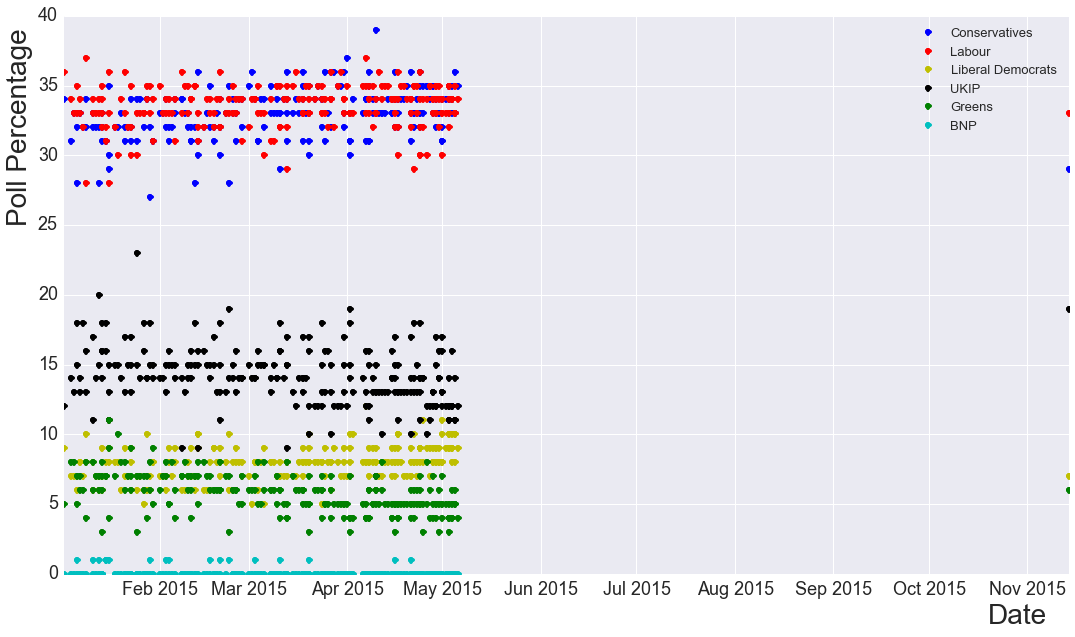

In [24]:
fig = plt.figure(figsize=(18,10))

plt.plot(df_2015["Date"],df_2015["Con"],'bo',label="Conservatives")
plt.plot(df_2015["Date"],df_2015["Lab"],'ro',label="Labour")
plt.plot(df_2015["Date"],df_2015["LD"],'yo',label="Liberal Democrats")
plt.plot(df_2015["Date"],df_2015["UKIP"],'ko',label="UKIP")
plt.plot(df_2015["Date"],df_2015["Green"],'go',label="Greens")
plt.plot(df_2015["Date"],df_2015["BNP"],'co',label="BNP")
plt.legend(fontsize=13)
plt.xlabel("Date",fontsize=28,x=0.95,y=1)
plt.ylabel("Poll Percentage",fontsize=28,x=0,y=0.8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Now let's group things together on a month to month basis.

In [25]:
df_2015_means = df_2015.groupby("Date",as_index=False).mean()
df_2015_means.head()

,Date,Con,Unnamed: 9,Lab,Unnamed: 11,LD,Unnamed: 13,Con lead,Unnamed: 15,UKIP,...,BNP,Con good,Con bad,LD good,LD bad,LD net,UKIP good,UKIP bad,Grn good,Grn bad
0,2015-01-02,34,-1.0,36.0,1,9.0,0.0,-2.0,-2.0,12.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-04,31,-1.0,34.0,-2,7.0,1.0,-3.0,1.0,14.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-05,33,2.0,33.0,-1,7.0,0.0,0.0,3.0,13.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-06,30,-0.5,34.0,0,6.5,0.5,-4.0,-0.5,16.5,...,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-07,33,0.0,33.5,-1,8.0,0.0,-0.5,1.0,13.5,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


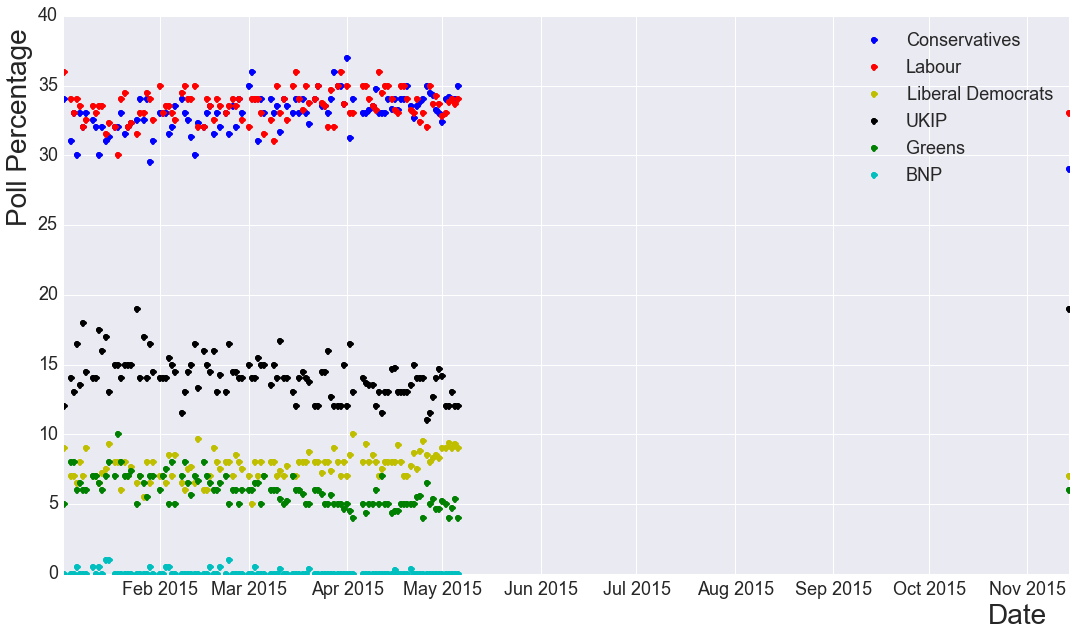

In [50]:
fig = plt.figure(figsize=(18,10))

plt.plot(df_2015_means["Date"],df_2015_means["Con"],'bo',label="Conservatives")
plt.plot(df_2015_means["Date"],df_2015_means["Lab"],'ro',label="Labour")
plt.plot(df_2015_means["Date"],df_2015_means["LD"],'yo',label="Liberal Democrats")
plt.plot(df_2015_means["Date"],df_2015_means["UKIP"],'ko',label="UKIP")
plt.plot(df_2015_means["Date"],df_2015_means["Green"],'go',label="Greens")
plt.plot(df_2015_means["Date"],df_2015_means["BNP"],'co',label="BNP")
plt.legend(fontsize=18)
plt.xlabel("Date",fontsize=28,x=0.95,y=1)
plt.ylabel("Poll Percentage",fontsize=28,x=0,y=0.8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Now I want to do some fitting to the data to see some trends.  For this, I will do some linear regression.  Ideally, I would do this with the date, but I can't use the date type in the regression analysis.  Therefore, I will create an index column and use that. 

In [27]:
df_test = df_2015_means
df_test.reset_index(inplace=True)
df_test.drop(["index"],1,inplace=True)
df_test.reset_index(inplace=True)
df_test

,index,Date,Con,Unnamed: 9,Lab,Unnamed: 11,LD,Unnamed: 13,Con lead,Unnamed: 15,...,BNP,Con good,Con bad,LD good,LD bad,LD net,UKIP good,UKIP bad,Grn good,Grn bad
0,0,2015-01-02,34.000000,-1.000000,36.000000,1.000000,9.000000,0.000000,-2.000000,-2.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2015-01-04,31.000000,-1.000000,34.000000,-2.000000,7.000000,1.000000,-3.000000,1.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2015-01-05,33.000000,2.000000,33.000000,-1.000000,7.000000,0.000000,0.000000,3.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2015-01-06,30.000000,-0.500000,34.000000,0.000000,6.500000,0.500000,-4.000000,-0.500000,...,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2015-01-07,33.000000,0.000000,33.500000,-1.000000,8.000000,0.000000,-0.500000,1.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2015-01-08,32.000000,-1.000000,32.000000,-1.000000,7.000000,-1.000000,0.000000,0.000000,...,0.000000,40.0,52.0,17.0,72.0,-55.0,NaN,NaN,NaN,NaN
6,6,2015-01-09,33.000000,1.500000,32.500000,0.000000,9.000000,1.000000,0.500000,1.500000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,2015-01-11,32.500000,0.500000,33.500000,3.000000,7.000000,-1.000000,-1.000000,-2.500000,...,0.500000,41.0,52.0,25.0,64.0,-39.0,35.0,48,NaN,NaN
8,8,2015-01-12,32.000000,0.000000,33.000000,0.000000,7.000000,1.000000,-1.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2015-01-13,30.000000,-2.000000,33.500000,0.500000,6.500000,-1.000000,-3.500000,-2.500000,...,0.500000,36.0,47.0,16.0,61.0,-45.0,33.0,42,NaN,NaN


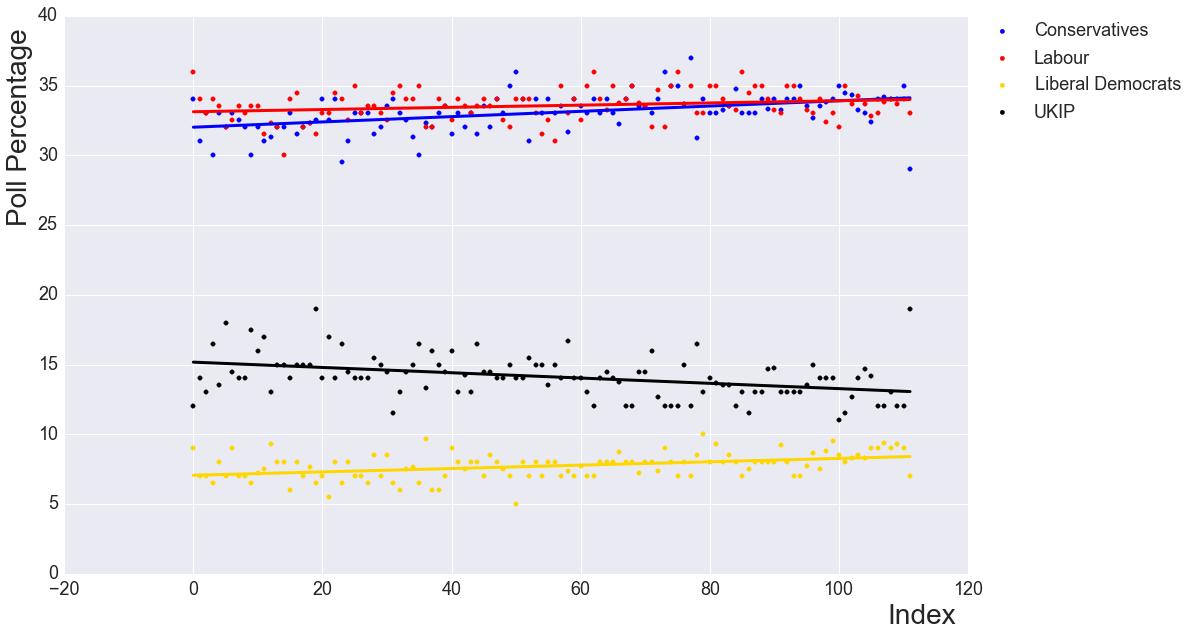

In [52]:
fig = plt.figure(figsize=(18,10))
ax = plt.subplot(111)

from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

length = len(df_test["index"])

x = df_test["index"].values
y1 = df_test["Con"].values
y2 = df_test["Lab"].values
y3 = df_test["LD"].values
y4 = df_test["UKIP"].values

x = x.reshape(length, 1)
y1 = y1.reshape(length, 1)
y2 = y2.reshape(length, 1)
y3 = y3.reshape(length, 1)
y4 = y4.reshape(length, 1)

# Train the model using the training sets
fit1 = regr.fit(x, y1)
pred1 = regr.predict(x)

fit2 = regr.fit(x, y2)
pred2 = regr.predict(x)

fit3 = regr.fit(x, y3)
pred3 = regr.predict(x)

fit4 = regr.fit(x, y4)
pred4 = regr.predict(x)

plt.scatter(x, y1,  color='blue',label="Conservatives")
plt.plot(x, pred1, color='blue',linewidth=3)

plt.scatter(x, y2,  color='red',label="Labour")
plt.plot(x, pred2, color='red',linewidth=3)

plt.scatter(x, y3,  color='gold',label="Liberal Democrats")
plt.plot(x, pred3, color='gold',linewidth=3)

plt.scatter(x, y4,  color='black',label="UKIP")
plt.plot(x, pred4, color='black',linewidth=3)

plt.legend(fontsize=18,loc=7)
plt.xlabel("Index",fontsize=28,x=0.95,y=1)
plt.ylabel("Poll Percentage",fontsize=28,x=0,y=0.8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

box = ax.get_position()
ax.set_position([box.x0,box.y0,box.width*0.9,box.height])
ax.legend(loc='center left', fontsize=18, bbox_to_anchor=(1,0.9))

plt.show()


This gives me some measure of how things changed but unfortunately, it gives no idea how things are spread over time.  To do that, I need to create a new columns which transforms the Date column into "Day of year".

In [29]:
from datetime import datetime

def DayOfYear(date):
    
    return date.timetuple().tm_yday

df_test["DayOfYear"] = df_test["Date"].apply(DayOfYear)

In [30]:
df_test.head()

,index,Date,Con,Unnamed: 9,Lab,Unnamed: 11,LD,Unnamed: 13,Con lead,Unnamed: 15,...,Con good,Con bad,LD good,LD bad,LD net,UKIP good,UKIP bad,Grn good,Grn bad,DayOfYear
0,0,2015-01-02,34,-1.0,36.0,1,9.0,0.0,-2.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,1,2015-01-04,31,-1.0,34.0,-2,7.0,1.0,-3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,2,2015-01-05,33,2.0,33.0,-1,7.0,0.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,3,2015-01-06,30,-0.5,34.0,0,6.5,0.5,-4.0,-0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,4,2015-01-07,33,0.0,33.5,-1,8.0,0.0,-0.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7


Now I can retry my regression:

Slope: Con = [[ 0.00843164]]
Slope: Lab = [[ 0.0045767]]
Slope: LD = [[ 0.00687134]]
Slope: UKIP = [[-0.00764153]]


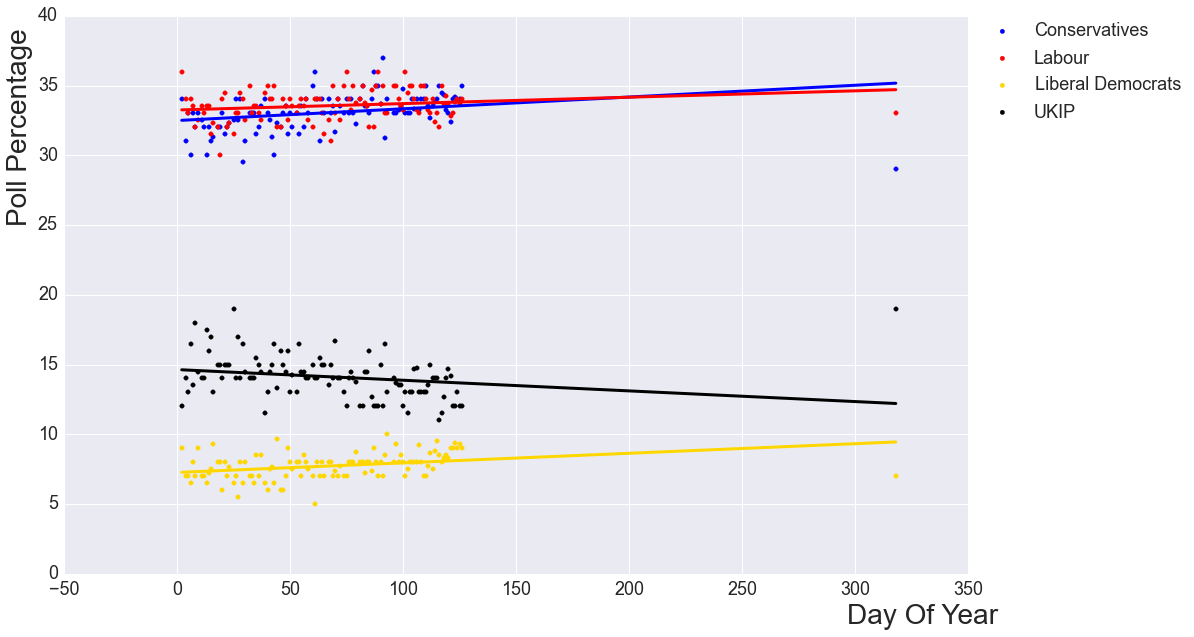

In [51]:
fig = plt.figure(figsize=(18,10))
ax = plt.subplot(111)

from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

df_test2 = df_test[df_test["DayOfYear"]<300]

length = len(df_test["DayOfYear"])

x = df_test["DayOfYear"].values
y1 = df_test["Con"].values
y2 = df_test["Lab"].values
y3 = df_test["LD"].values
y4 = df_test["UKIP"].values

x = x.reshape(length, 1)
y1 = y1.reshape(length, 1)
y2 = y2.reshape(length, 1)
y3 = y3.reshape(length, 1)
y4 = y4.reshape(length, 1)

# Train the model using the training sets
fit1 = regr.fit(x, y1)
pred1 = regr.predict(x)

print "Slope: Con =", regr.coef_

fit2 = regr.fit(x, y2)
pred2 = regr.predict(x)

print "Slope: Lab =", regr.coef_

fit3 = regr.fit(x, y3)
pred3 = regr.predict(x)

print "Slope: LD =", regr.coef_

fit4 = regr.fit(x, y4)
pred4 = regr.predict(x)

print "Slope: UKIP =", regr.coef_

plt.scatter(x, y1,  color='blue',label="Conservatives")
plt.plot(x, pred1, color='blue',linewidth=3)

plt.scatter(x, y2,  color='red',label="Labour")
plt.plot(x, pred2, color='red',linewidth=3)

plt.scatter(x, y3,  color='gold',label="Liberal Democrats")
plt.plot(x, pred3, color='gold',linewidth=3)

plt.scatter(x, y4,  color='black',label="UKIP")
plt.plot(x, pred4, color='black',linewidth=3)

plt.legend(fontsize=18,loc=7)
plt.xlabel("Day Of Year",fontsize=28,x=0.95,y=1)
plt.ylabel("Poll Percentage",fontsize=28,x=0,y=0.8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

box = ax.get_position()
ax.set_position([box.x0,box.y0,box.width*0.9,box.height])
ax.legend(loc='center left', fontsize=18, bbox_to_anchor=(1,0.9))
plt.show()

The above plots are quite interesting, showing the decrease in the UKIP vote over time and the change in the relative Labour and Conservative vote.  However, these are skewed by the outlier.  At the far right of the plot, there are outlier points.  Basically, an entry in the spreadsheet which is incorrect.  If I take this out and redo the fit, I see changes in slopes below.

The magnitude of each slope increases, whether positive or negative.

Slope: Con = [[ 0.01898889]]
Slope: Lab = [[ 0.00749072]]
Slope: LD = [[ 0.01106294]]
Slope: UKIP = [[-0.01925557]]


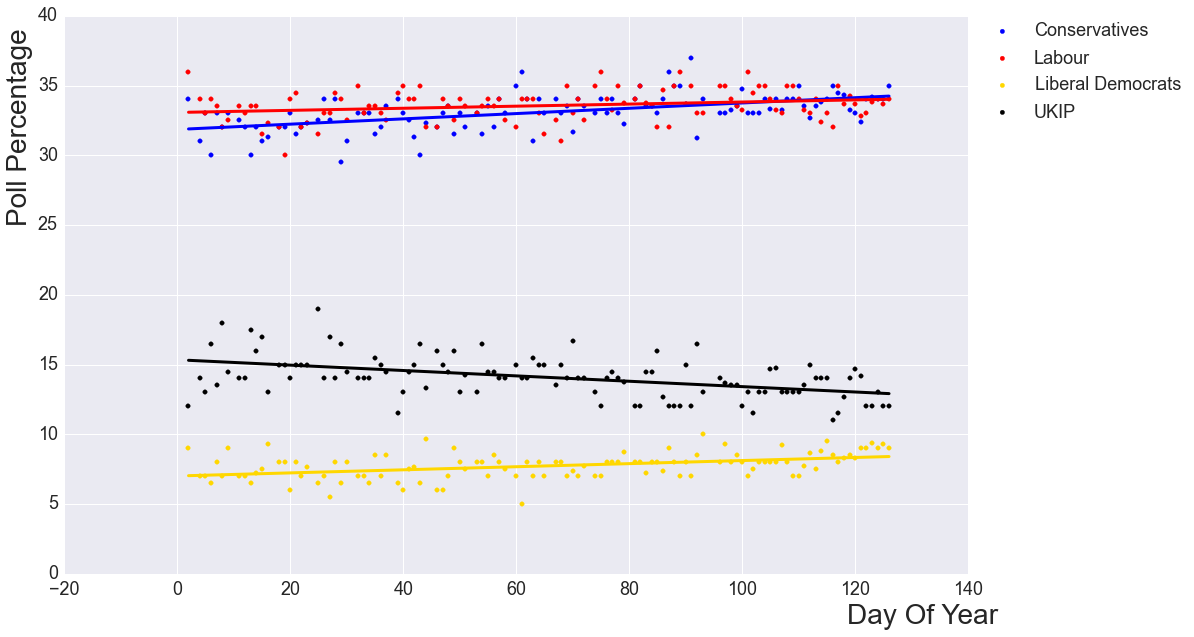

In [53]:
fig = plt.figure(figsize=(18,10))
ax = plt.subplot(111)

from sklearn import linear_model

# Create linear regression object
regr2 = linear_model.LinearRegression()

df_test2 = df_test[df_test["DayOfYear"]<300]

length = len(df_test2["DayOfYear"])

x = df_test2["DayOfYear"].values
y1 = df_test2["Con"].values
y2 = df_test2["Lab"].values
y3 = df_test2["LD"].values
y4 = df_test2["UKIP"].values

x = x.reshape(length, 1)
y1 = y1.reshape(length, 1)
y2 = y2.reshape(length, 1)
y3 = y3.reshape(length, 1)
y4 = y4.reshape(length, 1)

# Train the model using the training sets
fit1 = regr2.fit(x, y1)
pred1 = regr2.predict(x)

print "Slope: Con =", regr2.coef_

fit2 = regr2.fit(x, y2)
pred2 = regr2.predict(x)

print "Slope: Lab =", regr2.coef_

fit3 = regr2.fit(x, y3)
pred3 = regr2.predict(x)

print "Slope: LD =", regr2.coef_

fit4 = regr2.fit(x, y4)
pred4 = regr2.predict(x)

print "Slope: UKIP =", regr2.coef_

plt.scatter(x, y1,  color='blue',label="Conservatives")
plt.plot(x, pred1, color='blue',linewidth=3)

plt.scatter(x, y2,  color='red',label="Labour")
plt.plot(x, pred2, color='red',linewidth=3)

plt.scatter(x, y3,  color='gold',label="Liberal Democrats")
plt.plot(x, pred3, color='gold',linewidth=3)

plt.scatter(x, y4,  color='black',label="UKIP")
plt.plot(x, pred4, color='black',linewidth=3)

plt.xlabel("Day Of Year",fontsize=28,x=0.95,y=1)
plt.ylabel("Poll Percentage",fontsize=28,x=0,y=0.8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

box = ax.get_position()
ax.set_position([box.x0,box.y0,box.width*0.9,box.height])
ax.legend(loc='center left', fontsize=18, bbox_to_anchor=(1,0.9))
plt.show()



The other issue I have with this is that there are no uncertainties on the points.  A poll with a bigger sample size will have smaller uncertainties than a poll with just a few respondents.  Therefore, I need to look into the literature to find the poll sizes and add this information to the dataFrame and from there, calculate the relative uncertainties.

Some information is given here on the methodology of the polling from the different companies, but not what I want:

http://ukpollingreport.co.uk/blog/archives/9281

I will have to continue looking.